In [9]:
from google.colab import files
#Uplaoding csv data files from local to colab
uploaded = files.upload()

Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master.csv
Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master.csv


In [15]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Reading the training data into data
data= pd.read_csv('customer_churn_dataset-training-master.csv',encoding='utf-8')
#Printing the data head and its data types
print(data.head())
data.dtypes

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

Tenure of customers who have not churned
 135        5.0
146       49.0
153       14.0
176        3.0
187       35.0
          ... 
440828    54.0
440829     8.0
440830    35.0
440831    55.0
440832    48.0
Name: Tenure, Length: 190833, dtype: float64
Tenure of customers who have churned
 0         39.0
1         49.0
2         14.0
3         38.0
4         32.0
          ... 
253688    31.0
253689    38.0
253690    54.0
253691    42.0
253692    46.0
Name: Tenure, Length: 249999, dtype: float64


Text(0, 0.5, 'Number of customers')

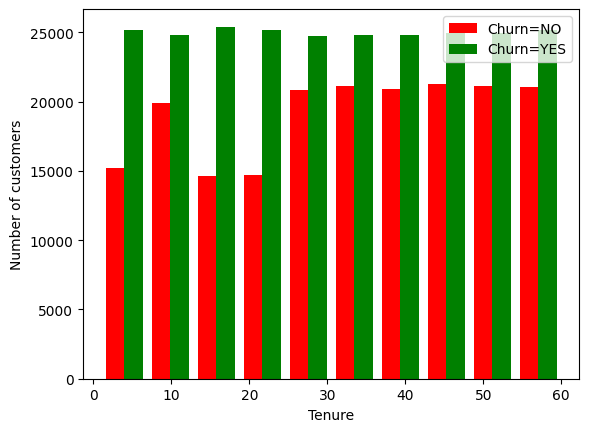

In [26]:
#Plotting the comparison of tenure of churned and non-churned customers
tenure_no_churn=data[data.Churn==0].Tenure
print("Tenure of customers who have not churned\n",tenure_no_churn)
tenure_yes_churn=data[data.Churn==1].Tenure
print("Tenure of customers who have churned\n",tenure_yes_churn)
plt.hist([tenure_no_churn,tenure_yes_churn],color=['red','green'],label=['Churn=NO','Churn=YES'])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Number of customers")

Total expenditure of customers who have not churned
 135       787.00
146       953.00
153       594.00
176       850.00
187       951.00
           ...  
440828    716.38
440829    745.38
440830    977.31
440831    602.55
440832    567.77
Name: Total Spend, Length: 190833, dtype: float64
Total expenditure of customers who have churned
 0         932.00
1         557.00
2         185.00
3         396.00
4         617.00
           ...  
253688    924.84
253689    303.69
253690    102.56
253691    337.81
253692    248.28
Name: Total Spend, Length: 249999, dtype: float64


Text(0, 0.5, 'Number of customers')

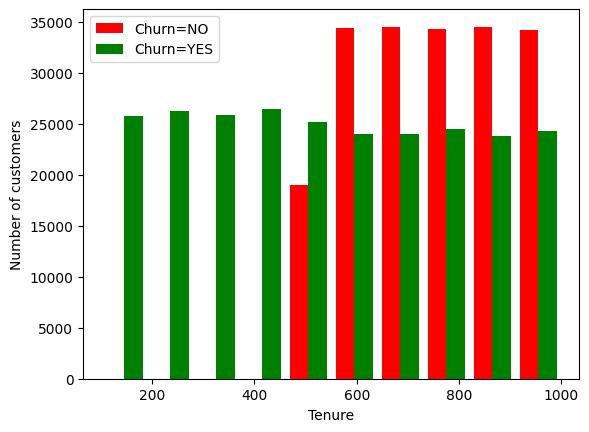

In [29]:
#Plotting the comparison of Total expenditure of churned and non-churned customers
te_no_churn=data[data.Churn==0]['Total Spend']
print("Total expenditure of customers who have not churned\n",te_no_churn)
te_yes_churn=data[data.Churn==1]['Total Spend']
print("Total expenditure of customers who have churned\n",te_yes_churn)
plt.hist([te_no_churn,te_yes_churn],color=['red','green'],label=['Churn=NO','Churn=YES'])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Number of customers")

In [32]:
#Function to print all the categorical columns
def print_unique_cols_data(data):
  for column in data:
    if data[column].dtype==object:
      print(column)
      print(data[column].unique())
print_unique_cols_data(data)

Gender
['Female' 'Male' nan]
Subscription Type
['Standard' 'Basic' 'Premium' nan]
Contract Length
['Annual' 'Monthly' 'Quarterly' nan]


In [35]:
print(data.columns)

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn', 'Gender_Female',
       'Gender_Male', 'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')


In [53]:
#Performing one-hot encoding of the categorical labels
data_encode=pd.get_dummies(data=data,columns=['Gender_Female','Gender_Male','Subscription Type_Basic','Subscription Type_Standard','Subscription Type_Premium','Contract Length_Annual','Contract Length_Monthly','Contract Length_Quarterly'],dummy_na=False)
data_encode=data_encode.fillna(0)
data_encode=data_encode.astype(int)
print(data_encode)

        Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0        30      39               14              5             18   
1        65      49                1             10              8   
2        55      14                4              6             18   
3        58      38               21              7              7   
4        23      32               20              5              8   
...     ...     ...              ...            ...            ...   
440828   42      54               15              1              3   
440829   25       8               13              1             20   
440830   26      35               27              1              5   
440831   28      55               14              2              0   
440832   31      48               20              1             14   

        Total Spend  Last Interaction  Churn  Gender_Female_False  \
0               932                17      1                    0   
1               557  

In [54]:
data_encode.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn', 'Gender_Female_False',
       'Gender_Female_True', 'Gender_Male_False', 'Gender_Male_True',
       'Subscription Type_Basic_False', 'Subscription Type_Basic_True',
       'Subscription Type_Standard_False', 'Subscription Type_Standard_True',
       'Subscription Type_Premium_False', 'Subscription Type_Premium_True',
       'Contract Length_Annual_False', 'Contract Length_Annual_True',
       'Contract Length_Monthly_False', 'Contract Length_Monthly_True',
       'Contract Length_Quarterly_False', 'Contract Length_Quarterly_True'],
      dtype='object')

In [55]:
data_encode.dtypes

Age                                 int64
Tenure                              int64
Usage Frequency                     int64
Support Calls                       int64
Payment Delay                       int64
Total Spend                         int64
Last Interaction                    int64
Churn                               int64
Gender_Female_False                 int64
Gender_Female_True                  int64
Gender_Male_False                   int64
Gender_Male_True                    int64
Subscription Type_Basic_False       int64
Subscription Type_Basic_True        int64
Subscription Type_Standard_False    int64
Subscription Type_Standard_True     int64
Subscription Type_Premium_False     int64
Subscription Type_Premium_True      int64
Contract Length_Annual_False        int64
Contract Length_Annual_True         int64
Contract Length_Monthly_False       int64
Contract Length_Monthly_True        int64
Contract Length_Quarterly_False     int64
Contract Length_Quarterly_True    

In [49]:
#Scaling the Tenure column for better computation
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_encode['Tenure']=scaler.fit_transform(data_encode[['Tenure']])
data_encode.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male_False,...,Subscription Type_Standard_False,Subscription Type_Standard_True,Subscription Type_Premium_False,Subscription Type_Premium_True,Contract Length_Annual_False,Contract Length_Annual_True,Contract Length_Monthly_False,Contract Length_Monthly_True,Contract Length_Quarterly_False,Contract Length_Quarterly_True
0,30,0.650000,14,5,18,932,17,1,1,1,...,0,1,1,0,0,1,1,0,1,0
1,65,0.816667,1,10,8,557,6,1,1,1,...,1,0,1,0,1,0,0,1,1,0
2,55,0.233333,4,6,18,185,3,1,1,1,...,1,0,1,0,1,0,1,0,0,1
3,58,0.633333,21,7,7,396,29,1,0,0,...,0,1,1,0,1,0,0,1,1,0
4,23,0.533333,20,5,8,617,20,1,0,0,...,1,0,1,0,1,0,0,1,1,0


In [50]:
#Preprocessing the testing data in similar manner as the training dataset
test_data=pd.read_csv('customer_churn_dataset-testing-master.csv',encoding='utf-8')
print(test_data.head())
test_data.dtypes

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

In [51]:
#Printing all categorical data int he test data
#Function to print all the categorical columns
def print_unique_cols_test_data(test_data):
  for column in test_data:
    if test_data[column].dtype==object:
      print(column)
      print(test_data[column].unique())
print_unique_cols_test_data(test_data)

Gender
['Female' 'Male']
Subscription Type
['Basic' 'Standard' 'Premium']
Contract Length
['Monthly' 'Annual' 'Quarterly']


In [59]:
print(test_data.columns)
#Performing one-hot encoding of the categorical labels in the test data
test_data_encode=pd.get_dummies(data=test_data,columns=['Gender','Subscription Type','Contract Length'],dummy_na=False)
test_data_encode=test_data_encode.fillna(0)
test_data_encode=test_data_encode.astype(int)
print(test_data_encode)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
       CustomerID  Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0               1   22      25               14              4             27   
1               2   41      28               28              7             13   
2               3   47      27               10              2             29   
3               4   35       9               12              5             17   
4               5   53      58               24              9              2   
...           ...  ...     ...              ...            ...            ...   
64369       64370   45      33               12              6             21   
64370       64371   37       6                1              5             22   
64371       64372   25      39               14  

In [60]:
#Scaling the Tenure column in test data for better computation
scaler=MinMaxScaler()
test_data_encode['Tenure']=scaler.fit_transform(test_data_encode[['Tenure']])
test_data_encode.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,0.406780,14,4,27,598,9,1,1,0,1,0,0,0,1,0
1,2,41,0.457627,28,7,13,584,20,0,1,0,0,0,1,0,1,0
2,3,47,0.440678,10,2,29,757,21,0,0,1,0,1,0,1,0,0
3,4,35,0.135593,12,5,17,232,18,0,0,1,0,1,0,0,0,1
4,5,53,0.966102,24,9,2,533,18,0,1,0,0,0,1,1,0,0


In [71]:
#Training and Testing data
# Separate the features and the target variable for the training data
X_train = data_encode.drop('Churn', axis='columns')
y_train = data_encode['Churn']


# Separate the features and the target variable for the testing data
X_test = test_data_encode.drop('Churn', axis='columns')
y_test = test_data_encode['Churn']

#Checking the shaoes for the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440833, 23)
(64374, 16)
(440833,)
(64374,)


In [62]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.6 MB/s eta 0:00:00


In [75]:
#Importing tensorflow libraries to train data using ANN
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

#Creating a neural network
model=keras.Sequential([
    #Input latyer x_train has 23 columns so input shape 15 for ANN RelU is the best activations function
    keras.layers.Dense(10,input_shape=(23,),activation='relu'),
    #Defining number of hidden layers as 5 which is less than the Input shape
    keras.layers.Dense(5,activation='relu'),
    #Ouput layer,sing Sigmoid activation as its binary classification of 1 or 0
    keras.layers.Dense(1,activation='sigmoid')
])
#Using adamW optimizer as it prevents overfitting in the prediciton
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
#Compiling the model
model.compile(optimizer=optimizer,
              #Using Binary Cross entropy loss as output is binary
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(X_train,y_train,epochs=30)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                240       
                                                                 
 dense_19 (Dense)            (None, 5)                 55        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
13777/13777 [==============================] - 26s 2ms/step - loss: 0.3033 - accuracy: 0.8793
Epoch 2/30
13777/13777 [==============================] - 27s 2ms/step - loss: 0.2210 - accuracy: 0.9106
Epoch 3/30
13777/13777 [==============================] - 27s 2ms/step - loss: